Schema Definition for RDF Graph

In [1]:
#!pip install networkx pyvis rdflib ipython numpy matplotlib pygraphviz
#!pip install

In [2]:
import networkx as nx
from rdflib import Graph, Namespace, Literal
from rdflib.namespace import RDF, RDFS, XSD
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from rdflib.plugins.sparql import prepareQuery
from functions import *
import duckdb

In [3]:
# Crear un grafo RDF
g = Graph()

# Definir los Namespaces
ex = Namespace('http://example.org/')
loc = Namespace('http://example.org/location/')
ent = Namespace('http://example.org/entertainment/')
apt = Namespace('http://example.org/apartment/')
inc = Namespace('http://example.org/incident/')
schema = Namespace('http://schema.org/')
# Vinculate Namespaces to graph RDF
g.bind('ex', ex)
g.bind('loc', loc)
g.bind('ent', ent)
g.bind('apt', apt)
g.bind('inc', inc)
g.bind('schema', schema)

General Schema Definition

In [4]:
# Define Classes
g.add((loc.Locations, RDF.type, RDFS.Class))
g.add((loc.District, RDF.type, RDFS.Class))
g.add((inc.Incident, RDF.type, RDFS.Class))

# Define Locations subclases
g.add((ent.Entertainment, RDF.type, RDFS.Class))
g.add((ent.Entertainment, RDFS.subClassOf, loc.Locations))

g.add((apt.Apartment, RDF.type, RDFS.Class))
g.add((apt.Apartment, RDFS.subClassOf, loc.Locations))

# Define isinDistrict propiety 
g.add((loc.isinDistrict, RDF.type, RDF.Property))
g.add((loc.isinDistrict, RDFS.domain, loc.Locations))
g.add((loc.isinDistrict, RDFS.range, loc.District))

# Define Longitude propiety
g.add((loc.Longitude, RDF.type, RDF.Property))
g.add((loc.Longitude, RDFS.domain, loc.Locations))
g.add((loc.Longitude, RDFS.range, XSD.float))

# Define Latitude propiety
g.add((loc.Latitude, RDF.type, RDF.Property))
g.add((loc.Latitude, RDFS.domain, loc.Locations))
g.add((loc.Latitude, RDFS.range, XSD.float))

<Graph identifier=N21f7586b522946478f344897a4cbc1fe (<class 'rdflib.graph.Graph'>)>

Incident Schema Definition: 

For the incident schema, the variables that will be needed are: 

- any: year
- num_mes: numberMonth
- nom_mes: nameMonth
- area_basica_policial: Reference the District Class (neighbourhood).
- tipus_de_lloc_dels_fets: wherePenalCode
- tipus_de_fet_codi_penal: typePenalCode
- ambit_fet: incidentType
- nombre_victimes: numberVictims

An example of an instance is: 
- any: 2021
- num_mes: 6
- nom_mes: Juny
- area_basica_policial: Nou Barris
- tipus_de_lloc_dels_fets: Via pública urbana
- tipus_de_fet_codi_penal: Amenaces
- ambit_fet:  Political orientation	
- nombre_victimes: 1.0

In [5]:
# Define happenedAt
g.add((inc.happenedAt, RDF.type, RDF.Property))
g.add((inc.happenedAt, RDFS.domain, inc.Incident))
g.add((inc.happenedAt, RDFS.range, loc.District))

# Define year
g.add((inc.year, RDF.type, RDF.Property))
g.add((inc.year, RDFS.domain, inc.Incident))
g.add((inc.year, RDFS.range, XSD.integer))

# Define numberMonth
g.add((inc.numberMonth, RDF.type, RDF.Property))
g.add((inc.numberMonth, RDFS.domain, inc.Incident))
g.add((inc.numberMonth, RDFS.range, XSD.integer))

# Define nameMonth
g.add((inc.nameMonth, RDF.type, RDF.Property))
g.add((inc.nameMonth, RDFS.domain, inc.Incident))
g.add((inc.nameMonth, RDFS.range, XSD.string))

# Define typePenalCode
g.add((inc.typePenalCode, RDF.type, RDF.Property))
g.add((inc.typePenalCode, RDFS.domain, inc.Incident))
g.add((inc.typePenalCode, RDFS.range, XSD.string))

# Define wherePenalCode
g.add((inc.wherePenalCode, RDF.type, RDF.Property))
g.add((inc.wherePenalCode, RDFS.domain, inc.Incident))
g.add((inc.wherePenalCode, RDFS.range, XSD.string))

# Define incidentType 
g.add((inc.incidentType, RDF.type, RDF.Property))
g.add((inc.incidentType, RDFS.domain, inc.Incident))
g.add((inc.incidentType, RDFS.range, XSD.string))

# Define numberVictims
g.add((inc.numberVictims, RDF.type, RDF.Property))
g.add((inc.numberVictims, RDFS.domain, inc.Incident))
g.add((inc.numberVictims, RDFS.range, XSD.float))

<Graph identifier=N21f7586b522946478f344897a4cbc1fe (<class 'rdflib.graph.Graph'>)>

Airbnb Schema Definition

For the Airbnb schema, the variables that will be needed are: 

- neighbourhood: Reference the District Class (neighbourhood).
- latitude: Reference the Latitude domain.
- longitude: Reference the Longitude domain.
- criminality index: criminalityIndex
- extra_people: extraPeople
- property_type: propertyType
- room_type: roomType
- accommodates: accommodates
- bathrooms: bathrooms
- bedrooms: bedrooms
- beds: beds
- bed_type: bedType
- price (x night): price
- security_deposit: securityDeposit
- cleaning_fee: cleaningFee
- guests_included: guestsIncluded
- review_scores_location (0-10): reviewScoresLocation
- cancellation_policy: cancellationPolicy


An example of an instance is: 

- neighbourhood: Reference the District Class (neighbourhood).
- latitude: Reference the Latitude domain.
- longitude: Reference the Longitude domain.
- criminality index: criminalityIndex
- extra_people: extraPeople
- property_type: Apartment
- room_type: Private room
- accommodates: 2
- bathrooms: 2.0
- bedrooms: 1.0
- beds: 2.0
- bed_type: Real Bed
- price (x night): 21.0
- security_deposit: 123.0
- cleaning_fee: 54.0
- guests_included: 1
- review_scores_location (0-10): 100.0	
- cancellation_policy: moderate	

In [6]:
# Define criminalityIndex
g.add((apt.criminalityIndex, RDF.type, RDF.Property))
g.add((apt.criminalityIndex, RDFS.domain, apt.Apartment))
g.add((apt.criminalityIndex, RDFS.range, XSD.float))

# Define extraPeople
g.add((apt.extraPeople, RDF.type, RDF.Property))
g.add((apt.extraPeople, RDFS.domain, apt.Apartment))
g.add((apt.extraPeople, RDFS.range, XSD.integer))

# Define propertyType
g.add((apt.propertyType, RDF.type, RDF.Property))
g.add((apt.propertyType, RDFS.domain, apt.Apartment))
g.add((apt.propertyType, RDFS.range, XSD.string))

# Define roomType
g.add((apt.roomType, RDF.type, RDF.Property))
g.add((apt.roomType, RDFS.domain, apt.Apartment))
g.add((apt.roomType, RDFS.range, XSD.string))

# Define accommodates
g.add((apt.accommodates, RDF.type, RDF.Property))
g.add((apt.accommodates, RDFS.domain, apt.Apartment))
g.add((apt.accommodates, RDFS.range, XSD.integer))

# Define bathrooms
g.add((apt.bathrooms, RDF.type, RDF.Property))
g.add((apt.bathrooms, RDFS.domain, apt.Apartment))
g.add((apt.bathrooms, RDFS.range, XSD.integer))

# Define bedrooms
g.add((apt.bedrooms, RDF.type, RDF.Property))
g.add((apt.bedrooms, RDFS.domain, apt.Apartment))
g.add((apt.bedrooms, RDFS.range, XSD.integer))

# Define beds
g.add((apt.beds, RDF.type, RDF.Property))
g.add((apt.beds, RDFS.domain, apt.Apartment))
g.add((apt.beds, RDFS.range, XSD.integer))

# Define bedType
g.add((apt.bedType, RDF.type, RDF.Property))
g.add((apt.bedType, RDFS.domain, apt.Apartment))
g.add((apt.bedType, RDFS.range, XSD.string))

# Define price
g.add((apt.price, RDF.type, RDF.Property))
g.add((apt.price, RDFS.domain, apt.Apartment))
g.add((apt.price, RDFS.range, XSD.float))

# Define securityDeposit
g.add((apt.securityDeposit, RDF.type, RDF.Property))
g.add((apt.securityDeposit, RDFS.domain, apt.Apartment))
g.add((apt.securityDeposit, RDFS.range, XSD.float))

# Define cleaningFee
g.add((apt.cleaningFee, RDF.type, RDF.Property))
g.add((apt.cleaningFee, RDFS.domain, apt.Apartment))
g.add((apt.cleaningFee, RDFS.range, XSD.float))

# Define guestsIncluded
g.add((apt.guestsIncluded, RDF.type, RDF.Property))
g.add((apt.guestsIncluded, RDFS.domain, apt.Apartment))
g.add((apt.guestsIncluded, RDFS.range, XSD.integer))

# Define cancellationPolicy
g.add((apt.cancellationPolicy, RDF.type, RDF.Property))
g.add((apt.cancellationPolicy, RDFS.domain, apt.Apartment))
g.add((apt.cancellationPolicy, RDFS.range, XSD.string))

"""# Define reviewScoresLocation
g.add((apt.reviewScoresLocation, RDF.type, RDF.Property))
g.add((apt.reviewScoresLocation, RDFS.domain, apt.Apartment))
g.add((apt.reviewScoresLocation, RDFS.range, XSD.integer))  """

'# Define reviewScoresLocation\ng.add((apt.reviewScoresLocation, RDF.type, RDF.Property))\ng.add((apt.reviewScoresLocation, RDFS.domain, apt.Apartment))\ng.add((apt.reviewScoresLocation, RDFS.range, XSD.integer))  '

Tripadvisor Locations Schema Definition

For the Tripadvisor Locations schema, the variables that will be needed are: 

- location_id: S'HAURIA DE TREURE POTSER?

- neighbourhood: Reference the District Class (neighbourhood).
- latitude: Reference the Latitude domain.
- longitude: Reference the Longitude domain.
- name: name
- address_obj_address_string: adress
- type: type
- neighbourhood: Reference the District Class (neighbourhood).
- latitude: Reference the Latitude domain.
- longitude: Reference the Longitude domain.

An example of an instance is: 

- neighbourhood: Eixample
- latitude: 41.383205
- longitude: 2.162197
- name: Anna Subirats Xarcuteria
- address_obj_address_string: Carrer De Sepulveda, 167, 08011 Barcelona Spain
- type: restaurant

In [7]:
# Define name
g.add((ent.name, RDF.type, RDF.Property))
g.add((ent.name, RDFS.domain, ent.Entertainment))
g.add((ent.name, RDFS.range, XSD.string))

# Define adress
g.add((ent.adress, RDF.type, RDF.Property))
g.add((ent.adress, RDFS.domain, ent.Entertainment))
g.add((ent.adress, RDFS.range, XSD.string))

# Define typeEnt
g.add((ent.typeEnt, RDF.type, RDF.Property))
g.add((ent.typeEnt, RDFS.domain, ent.Entertainment))
g.add((ent.typeEnt, RDFS.range, XSD.string))

<Graph identifier=N21f7586b522946478f344897a4cbc1fe (<class 'rdflib.graph.Graph'>)>

 Instances Generator: Add the instances from the DuckDB to RDF

In [8]:
# Connection to trusted database
con = duckdb.connect(database='./../data/trusted_zone/barcelona_processed.db')

- Criminal Instances

In [9]:
# Connection to database
df_criminal = con.execute("SELECT * FROM df_criminal_dataset").fetchdf()
add_criminal_instances(g, loc, inc, ex, df_criminal)

- Airbnb Dataset

In [10]:
# Connection to database         

df_airbnb = con.execute("SELECT * FROM df_airbnb_listings").fetchdf()
add_airbnb_instances(g, apt, df_airbnb)

- Tripadvisor Datasets: Locations and Restaurants

In [11]:
# Connection to databases --> NO FUNCIONA
#df_tripadvisor_locations = con.execute("SELECT * FROM df_tripadvisor_locations").fetchdf()
#df_tripadvisor_reviews = con.execute("SELECT * FROM df_tripadvisor_reviews").fetchdf()
#add_entertainment_instances(g, ent, df_tripadvisor_reviews, 'locations')
#add_entertainment_instances(g, ent, df_tripadvisor_locations, 'restaurants')

Store the RDF dataset into Turtle format

In [12]:
g.serialize(destination='RDFGraph.ttl', format='turtle')

<Graph identifier=N21f7586b522946478f344897a4cbc1fe (<class 'rdflib.graph.Graph'>)>

Sanity Check: Verify if the instances are well added

In [13]:
print_random_instance(g, inc.Incident)


Random instance of type http://example.org/incident/Incident: http://example.org/incident_0
  22-rdf-syntax-ns#type: http://example.org/incident/Incident
  happenedAt: http://example.org/location/Nou_Barris
  year: 2021.0
  numberMonth: 6.0
  nameMonth: Juny
  typePenalCode: Amenaces
  wherePenalCode: Via pública urbana
  incidentType: Political orientation
  numberVictims: 1.0


In [14]:
con.close()

In [15]:
# Crear un grafo NetworkX para la visualización
nx_graph = nx.DiGraph()

# Añadir nodos y aristas al grafo NetworkX basados en el esquema con niveles específicos
for s, p, o in g:
    if p == RDF.type and o == RDFS.Class:
        if str(s).split('/')[-1] == 'Locations':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=1)
        elif str(s).split('/')[-1] in ['Apartment', 'Entertainment']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=2)
        elif str(s).split('/')[-1] in ['Incident', 'District']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=6)
    elif p == RDFS.subClassOf:
        nx_graph.add_edge(o, s, label='rdf:subClassOf')
    elif p == RDFS.domain:
        if str(s).split('/')[-1] in ['isinDistrict', 'Latitude', 'Longitude']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=3)
        elif str(s).split('/')[-1] == 'happened_at':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=5)
        elif str(s).split('/')[-1] == 'incidentType':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=7)
        nx_graph.add_edge(o, s, label='rdf:domain')
    elif p == RDFS.range:
        nx_graph.add_edge(s, o, label='rdf:range')
    elif isinstance(o, Literal):
        literal_label = f'"{o}"^^{o.datatype.split("#")[-1]}'
        nx_graph.add_node(o, label=literal_label, level=10)
        nx_graph.add_edge(s, o, label='rdf:'+str(p).split('/')[-1])

# Asegurarse de que todos los nodos tienen un label y nivel
for n in nx_graph.nodes():
    if 'label' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['label'] = str(n).split('/')[-1].split('#')[-1]
    if 'level' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['level'] = 5

# Generar posiciones de los nodos usando el diseño 'dot'
pos = graphviz_layout(nx_graph, prog='dot')

# Ajustar las posiciones para ordenar niveles descendientes
for node, coords in pos.items():
    level = nx_graph.nodes[node]['level']
    pos[node] = (coords[0], -level)

# Dibujar el grafo usando matplotlib
plt.figure(figsize=(20, 12))
nx.draw(nx_graph, pos, with_labels=True, labels={n: d['label'] for n, d in nx_graph.nodes(data=True)},
        node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)})

# Guardar la imagen en un archivo
plt.savefig("rdf_schema.png", format="PNG")

# Mostrar la imagen en el notebook
plt.show()

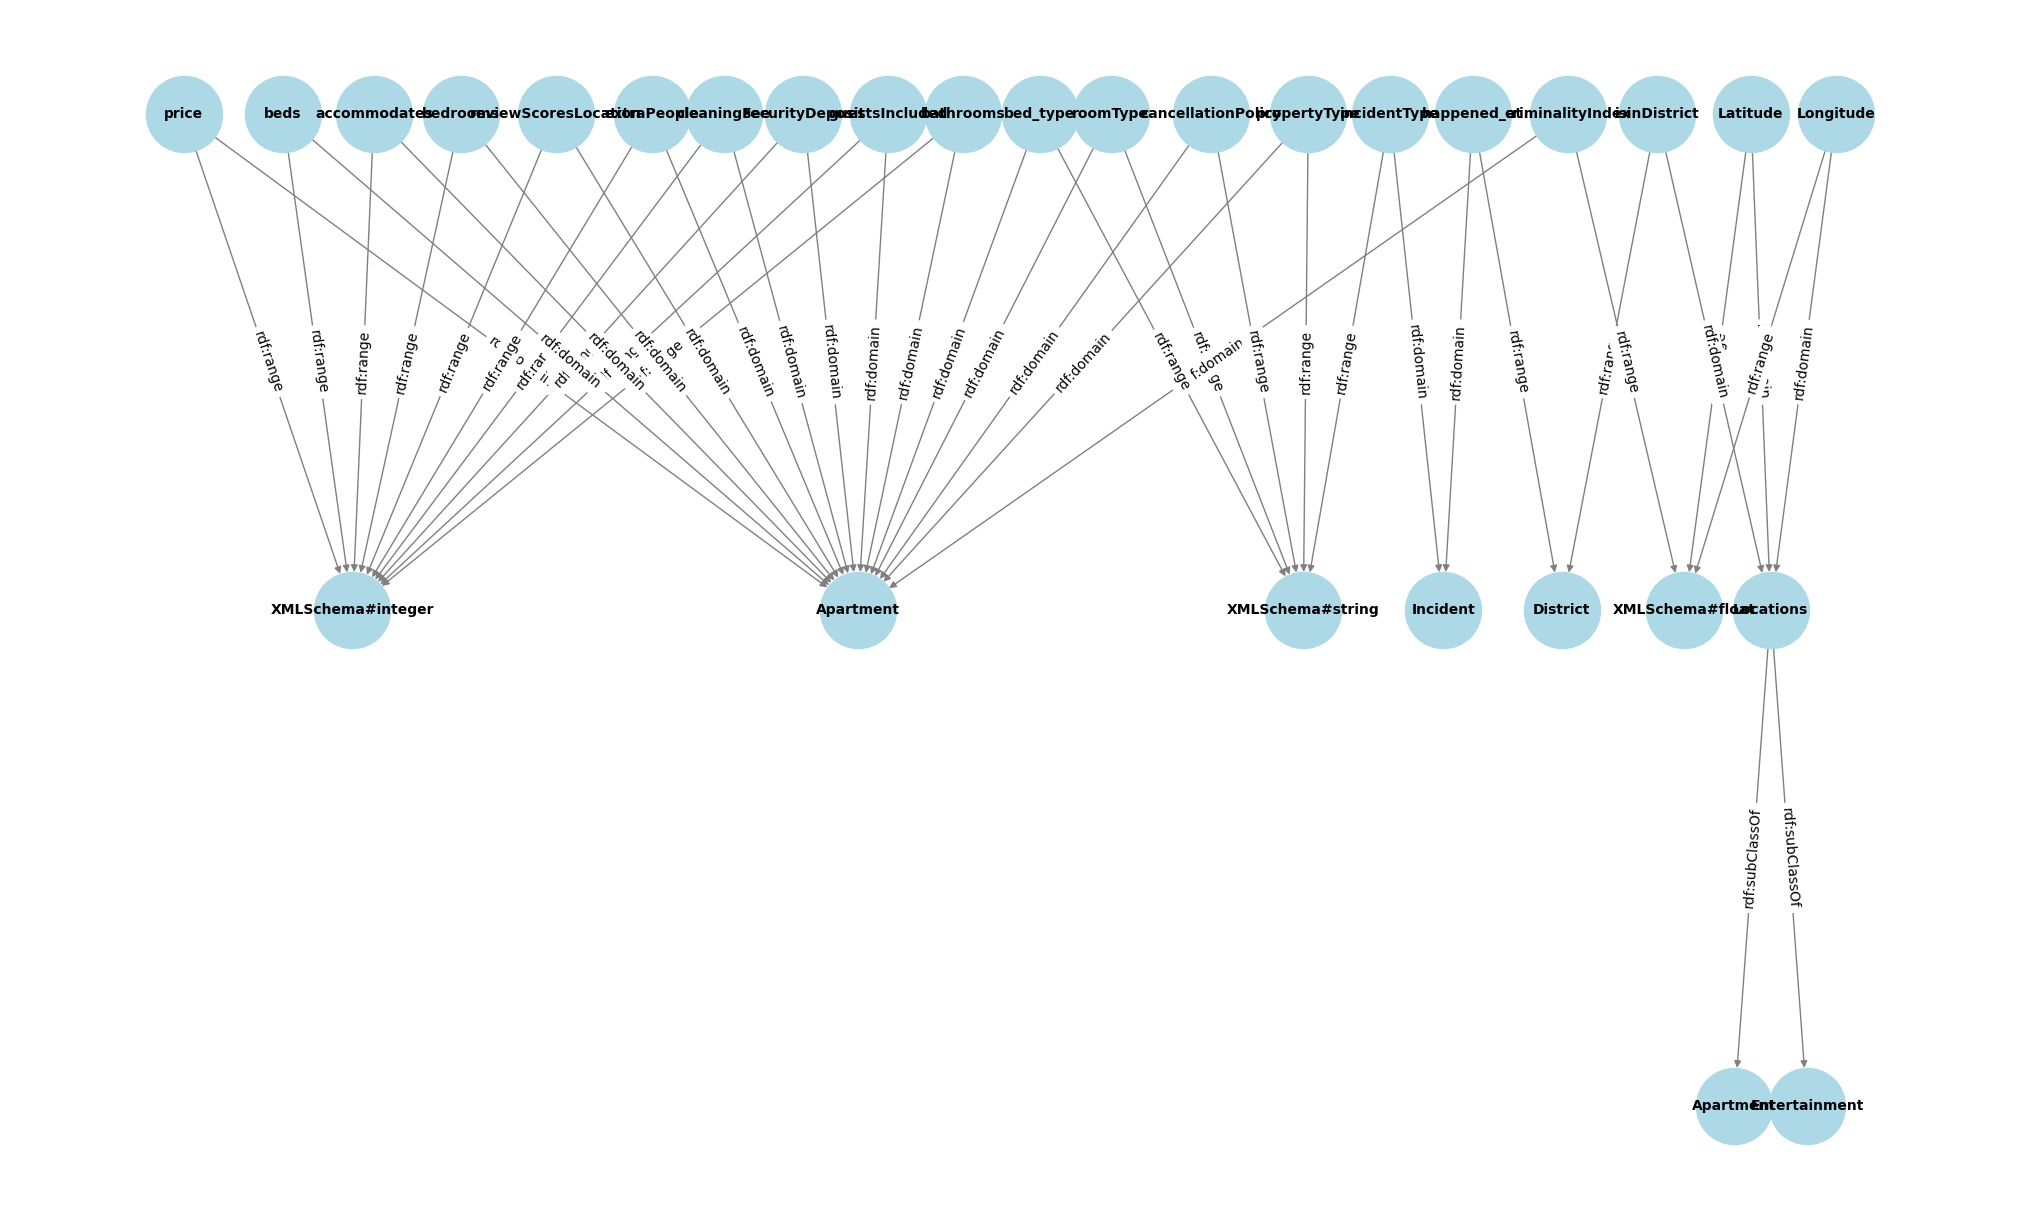

In [ ]:
# Crear un grafo NetworkX para la visualización
nx_graph = nx.DiGraph()

# Añadir nodos y aristas al grafo NetworkX basados en el esquema con niveles específicos
for s, p, o in g:
    if p == RDF.type and o == RDFS.Class:
        if str(s).split('/')[-1] == 'Locations':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=1)
        elif str(s).split('/')[-1] in ['Apartment', 'Entertainment']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=2)
        elif str(s).split('/')[-1] == 'District':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=3)
        elif str(s).split('/')[-1] == 'Incident':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=4)
    elif p == RDFS.subClassOf:
        nx_graph.add_edge(o, s, label='rdf:subClassOf')
    elif p == RDFS.domain:
        if str(s).split('/')[-1] in ['isinDistrict', 'Latitude', 'Longitude']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=3)
        elif str(s).split('/')[-1] == 'happened_at':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=4)
        elif str(s).split('/')[-1] == 'incidentType':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=5)
        nx_graph.add_edge(o, s, label='rdf:domain')
    elif p == RDFS.range:
        nx_graph.add_edge(s, o, label='rdf:range')
    elif isinstance(o, Literal):
        literal_label = f'"{o}"^^{o.datatype.split("#")[-1]}'
        nx_graph.add_node(o, label=literal_label, level=5)
        nx_graph.add_edge(s, o, label='rdf:'+str(p).split('/')[-1])

# Asegurarse de que todos los nodos tienen un label y nivel
for n in nx_graph.nodes():
    if 'label' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['label'] = str(n).split('/')[-1]
    if 'level' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['level'] = 5

# Generar posiciones de los nodos usando el diseño 'dot' con menor separación entre niveles
pos = graphviz_layout(nx_graph, prog='dot', args='-Granksep=0.2')

# Dibujar el grafo usando matplotlib
plt.figure(figsize=(20, 12))
nx.draw(nx_graph, pos, with_labels=True, labels={n: d['label'] for n, d in nx_graph.nodes(data=True)},
        node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)})


# Guardar la imagen en un archivo
plt.savefig("rdf_schema_hierarchical_levels_ordered_spaced.png", format="PNG")

# Mostrar la imagen en el notebook
plt.show()

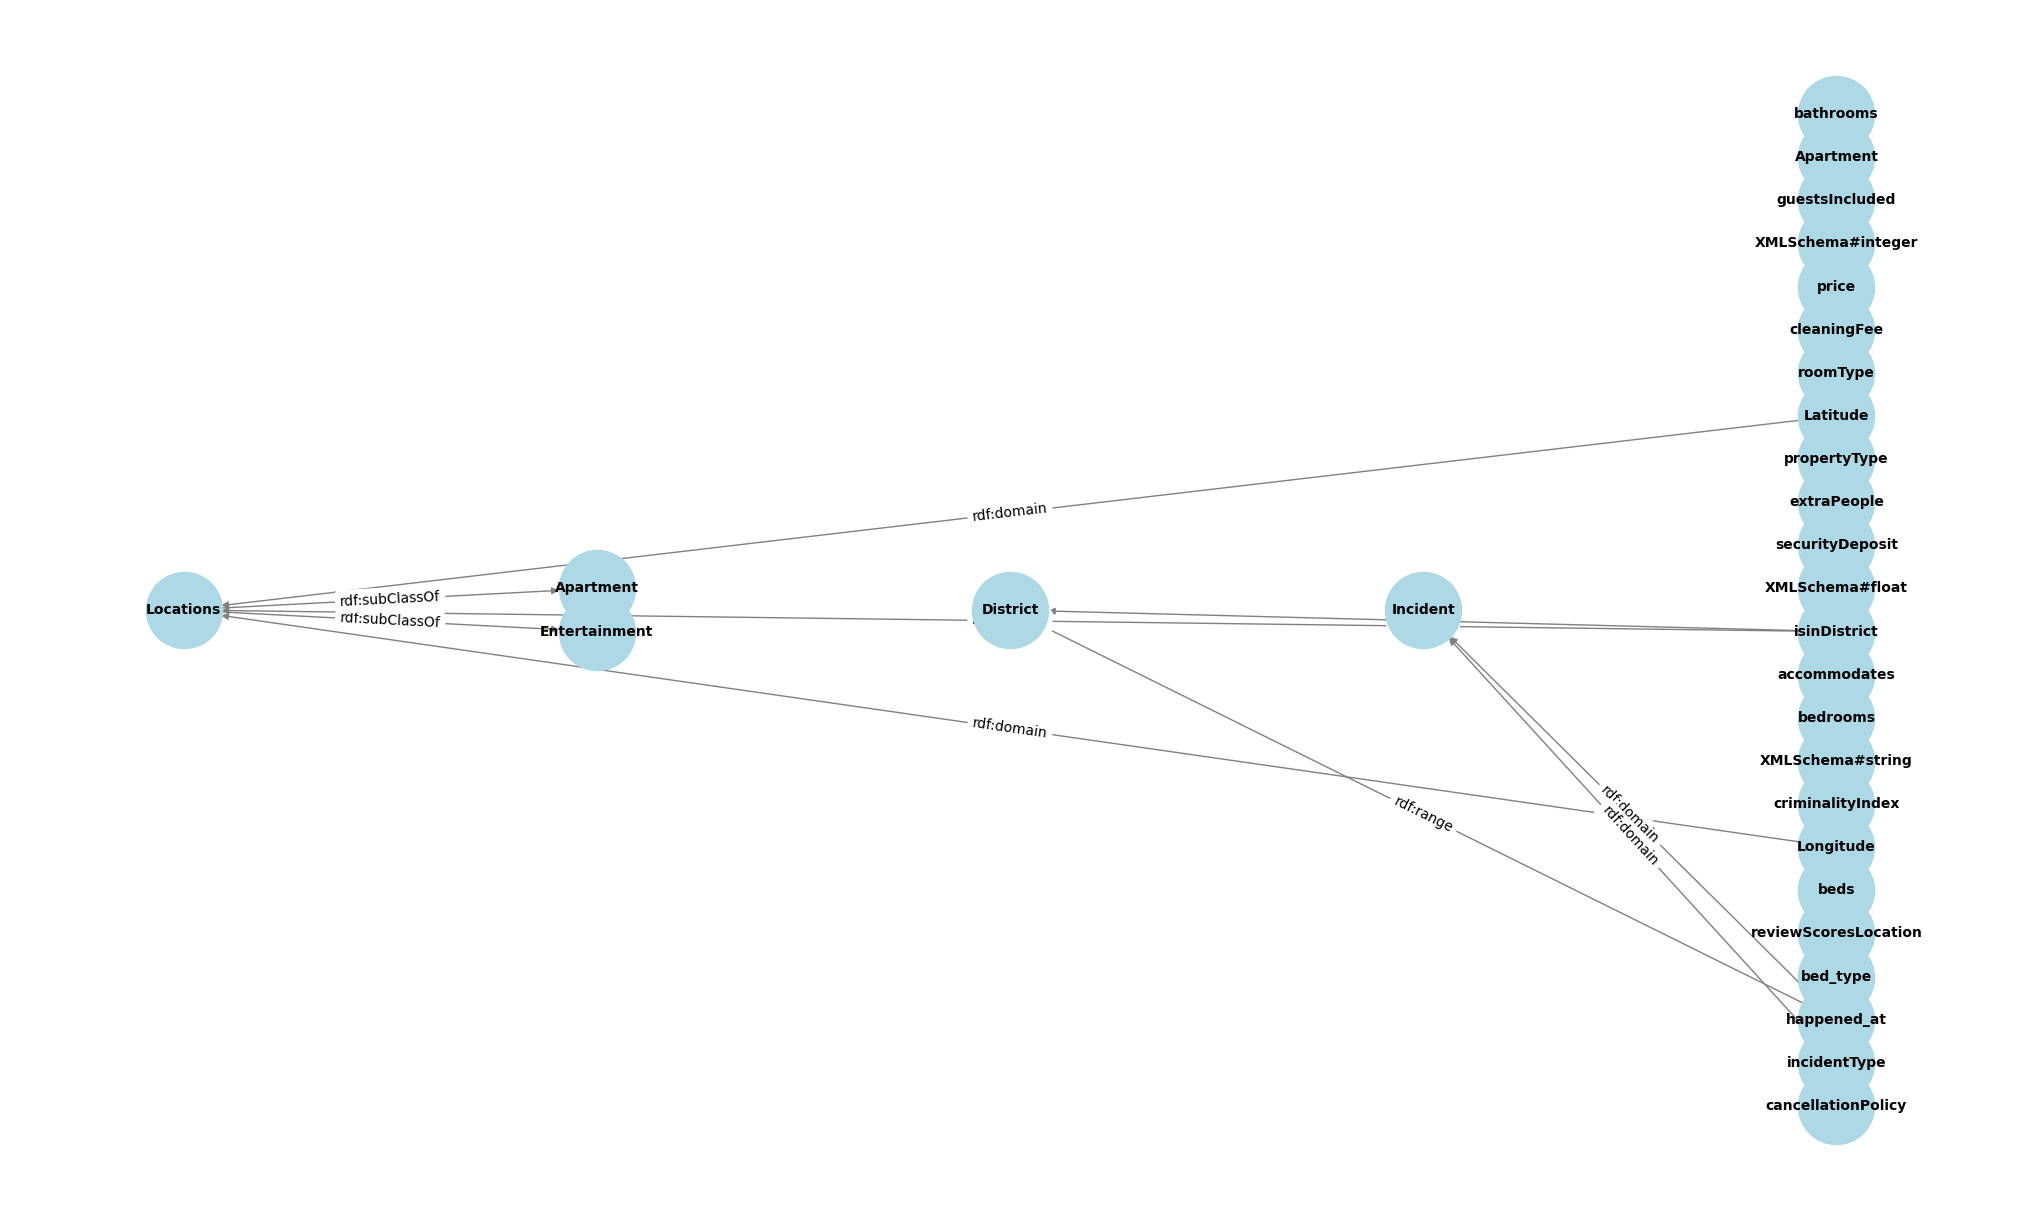

In [ ]:
# Crear un grafo NetworkX para la visualización
nx_graph = nx.DiGraph()

# Añadir nodos y aristas al grafo NetworkX basados en el esquema con niveles específicos
for s, p, o in g:
    if p == RDF.type and o == RDFS.Class:
        if str(s).split('/')[-1] == 'Locations':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=1)
        elif str(s).split('/')[-1] in ['Apartment', 'Entertainment']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=2)
        elif str(s).split('/')[-1] == 'District':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=4)
        elif str(s).split('/')[-1] == 'Incident':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=6)
    elif p == RDFS.subClassOf:
        nx_graph.add_edge(o, s, label='rdf:subClassOf')
    elif p == RDFS.domain:
        if str(s).split('/')[-1] in ['isinDistrict', 'Latitude', 'Longitude']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=3)
        elif str(s).split('/')[-1] == 'happened_at':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=5)
        elif str(s).split('/')[-1] == 'incidentType':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=7)
        nx_graph.add_edge(o, s, label='rdf:domain')
    elif p == RDFS.range:
        nx_graph.add_edge(s, o, label='rdf:range')
    elif isinstance(o, Literal):
        literal_label = f'"{o}"^^{o.datatype.split("#")[-1]}'
        nx_graph.add_node(o, label=literal_label, level=7)
        nx_graph.add_edge(s, o, label='rdf:'+str(p).split('/')[-1])

# Asegurarse de que todos los nodos tienen un label y nivel
for n in nx_graph.nodes():
    if 'label' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['label'] = str(n).split('/')[-1]
    if 'level' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['level'] = 7

# Generar posiciones de los nodos basadas en su nivel
pos = nx.multipartite_layout(nx_graph, subset_key="level", align="vertical")

# Dibujar el grafo usando matplotlib
plt.figure(figsize=(20, 12))
nx.draw(nx_graph, pos, with_labels=True, labels={n: d['label'] for n, d in nx_graph.nodes(data=True)},
        node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)})

# Guardar la imagen en un archivo
plt.savefig("rdf_schema.png", format="PNG")

# Mostrar la imagen en el notebook
plt.show()